### The following Installs Requirements.

In [7]:
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp311-cp311-macosx_11_0_arm64.whl (2

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### The following Code Reads the Data.

In [9]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP'}
numPolicies = len(int_to_alg)
numWeights = len(weight_to_int)
fileName = 'STP_results'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+".txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+".txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" and (data[7] in list(weight_to_int.keys())) and (int(data[5]) in list(int_to_alg.keys())):
                Weights[data[7]][int(data[5])].append(int(data[9]))
            if data[0] == "STP" and (data[5] in list(weight_to_int.keys())) and (int(data[3]) in list(int_to_alg.keys())):
                Weights[data[5]][int(data[3])].append(int(data[7]))

        cnt += 1
        if cnt/numLines*100 % 10 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
Done Reading the Data..


### The following Code Creates Box Plots.
one plot for each weight, each containing #policies boxes.

In [ ]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=False, sym='o', vert=True, whis=(5,95))
    # bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    ax.set_yscale('log')
    
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='o')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        average = np.average(data[alg])

        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy: '+int_to_alg[alg])
        print(' median: ', median)
        print(' average: ', round(average, 2))
        print(' upper_quartile: ', upper_quartile)
        print(' lower_quartile: ', lower_quartile)
        print(' upper_whisker: ', upper_whisker)
        print(' lower_whisker: ', lower_whisker)
        print()
    print('====================================')

### The following Code Creates Violin Plots.
one plot for each weight, each containing #policies violins.

In [ ]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))
    fig, axs = plt.subplots()

    axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    axs.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    medians = [np.median(data[alg]) for alg in range(len(data))]
    num_violins = len(data)
    pos = np.arange(num_violins) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_violins), axs.get_xticklabels()):

        axs.text(pos[tick], .97, upper_labels[tick],
                transform=axs.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)
    

    # plot violin plot
    axs.violinplot(data, showmeans=False, showmedians=True)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        average = np.average(data[alg])

        print(' Policy: '+int_to_alg[alg])
        print(' median: ', median)
        print(' average: ', round(average, 2))
        print()
    print('====================================')

### The following Code Creates the Ranking Rating.
Gets the two policies you want to compare.

Returns the the percentage of all problems in data, that one is better than the other.

Enter 'end' to terminate the run.

In [ ]:
from IPython.display import clear_output

table = []
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))
    table.append(data)

while True:
    print('Policies: ', int_to_alg, sep='')
    print('weights: ', list(weight_to_int.keys()), sep='')
    print('---------------------------------------------------------')

    # cl_w = input('Enter weight: ')
    # if str(cl_w).lower()=='end': break
    cl_p1 = input('Enter one policy (end to terminate): ')
    if str(cl_p1).lower()=='end': break
    cl_p2 = input('Enter another policy (end to terminate): ')
    if str(cl_p2).lower()=='end': break
    cl_p1 = int(cl_p1)
    cl_p2 = int(cl_p2)

    for cl_w in Weights.keys():

        listComparisonG = table[weight_to_int[cl_w]][cl_p1] > table[weight_to_int[cl_w]][cl_p2]
        listComparisonL = table[weight_to_int[cl_w]][cl_p1] < table[weight_to_int[cl_w]][cl_p2]
        listComparisonE = table[weight_to_int[cl_w]][cl_p1] == table[weight_to_int[cl_w]][cl_p2]
        comparisonG = np.sum(np.array(listComparisonG))
        comparisonL = np.sum(np.array(listComparisonL))
        comparisonE = np.sum(np.array(listComparisonE))

        sum = comparisonG + comparisonL + comparisonE

        print('---------------------- weight='+str(cl_w)+' ----------------------')
        print('In ',comparisonG,' out of ',sum,' (',round(comparisonG/sum*100, 2),' %) ',int_to_alg[cl_p1],' is worse than ',int_to_alg[cl_p2],'.', sep='')
        print('In ',comparisonL,' out of ',sum,' (',round(comparisonL/sum*100, 2),' %) ',int_to_alg[cl_p1],' is better than ',int_to_alg[cl_p2],'.', sep='')
        print('In ',comparisonE,' out of ',sum,' (',round(comparisonE/sum*100, 2),' %) ',' they have the same performance.', sep='')

    tmp = input('Press Enter (to continue) | end (to terminate):')
    if str(tmp).lower()=='end': break
    clear_output(wait=True)

### The following Code Provides Statistic's Info.
It returns Mean, Median, and Confidence Interval.

In [ ]:
%pip install scipy
%pip install pandas

---------------------- weight=1.50 ----------------------
policy WA* :  mean: 320115.81 | lower bound: 198244.24 | upper bound: 441987.38
policy pwXD :  mean: 70287.56 | lower bound: 40362.8 | upper bound: 100212.32
policy pwXU :  mean: 1094395.42 | lower bound: 693332.02 | upper bound: 1495458.82
policy XDP :  mean: 187216.21 | lower bound: 123601.3 | upper bound: 250831.12
policy XUP :  mean: 468165.14 | lower bound: 247733.23 | upper bound: 688597.05
policy DSMAP :  mean: 92173.82 | lower bound: 58498.52 | upper bound: 125849.12


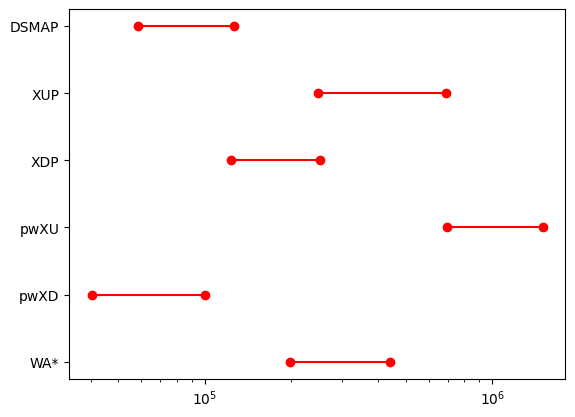

---------------------- weight=2.00 ----------------------
policy WA* :  mean: 40635.43 | lower bound: 28765.06 | upper bound: 52505.8
policy pwXD :  mean: 11226.78 | lower bound: 8787.95 | upper bound: 13665.61
policy pwXU :  mean: 431336.85 | lower bound: 234633.22 | upper bound: 628040.48
policy XDP :  mean: 21330.01 | lower bound: 15795.06 | upper bound: 26864.96
policy XUP :  mean: 71710.68 | lower bound: 53838.25 | upper bound: 89583.11
policy DSMAP :  mean: 12149.59 | lower bound: 9547.18 | upper bound: 14752.0


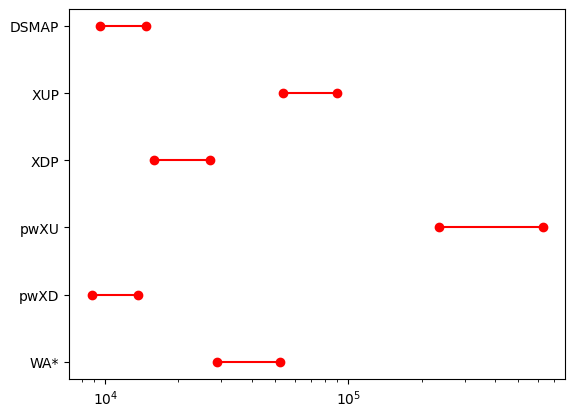

---------------------- weight=3.00 ----------------------
policy WA* :  mean: 11556.05 | lower bound: 7925.71 | upper bound: 15186.39
policy pwXD :  mean: 4977.79 | lower bound: 4014.43 | upper bound: 5941.15
policy pwXU :  mean: 81043.26 | lower bound: 6863.35 | upper bound: 155223.17
policy XDP :  mean: 7441.61 | lower bound: 5751.05 | upper bound: 9132.17
policy XUP :  mean: 16889.96 | lower bound: 12126.46 | upper bound: 21653.46
policy DSMAP :  mean: 4516.45 | lower bound: 3654.25 | upper bound: 5378.65


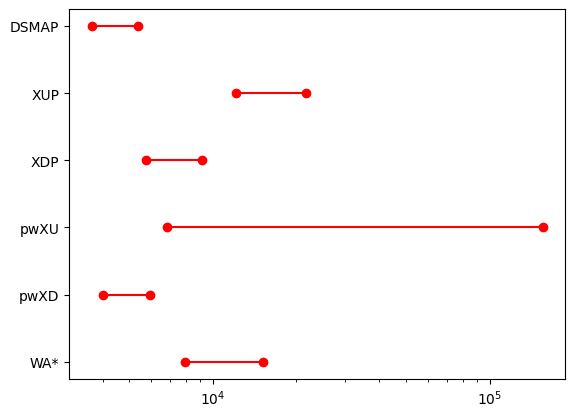

---------------------- weight=4.00 ----------------------
policy WA* :  mean: 6060.38 | lower bound: 4705.69 | upper bound: 7415.07
policy pwXD :  mean: 4325.43 | lower bound: 3649.21 | upper bound: 5001.65
policy pwXU :  mean: 24650.68 | lower bound: 17401.01 | upper bound: 31900.35
policy XDP :  mean: 5003.18 | lower bound: 3808.4 | upper bound: 6197.96
policy XUP :  mean: 9437.59 | lower bound: 7423.37 | upper bound: 11451.81
policy DSMAP :  mean: 3891.22 | lower bound: 3199.46 | upper bound: 4582.98


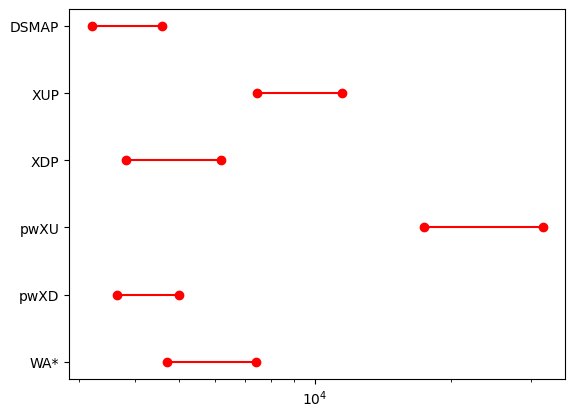

---------------------- weight=5.00 ----------------------
policy WA* :  mean: 4629.11 | lower bound: 3757.48 | upper bound: 5500.74
policy pwXD :  mean: 4256.41 | lower bound: 3645.05 | upper bound: 4867.77
policy pwXU :  mean: 13725.27 | lower bound: 10493.75 | upper bound: 16956.79
policy XDP :  mean: 4438.89 | lower bound: 3485.41 | upper bound: 5392.37
policy XUP :  mean: 6642.7 | lower bound: 5252.57 | upper bound: 8032.83
policy DSMAP :  mean: 3477.73 | lower bound: 2919.19 | upper bound: 4036.27


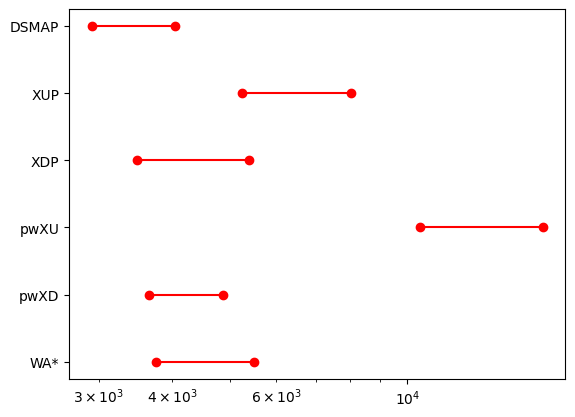

---------------------- weight=6.00 ----------------------
policy WA* :  mean: 4357.83 | lower bound: 3495.11 | upper bound: 5220.55
policy pwXD :  mean: 4436.23 | lower bound: 3813.88 | upper bound: 5058.58
policy pwXU :  mean: 13220.91 | lower bound: 8939.87 | upper bound: 17501.95
policy XDP :  mean: 3610.7 | lower bound: 3062.96 | upper bound: 4158.44
policy XUP :  mean: 5395.46 | lower bound: 4337.66 | upper bound: 6453.26
policy DSMAP :  mean: 3684.16 | lower bound: 3111.41 | upper bound: 4256.91


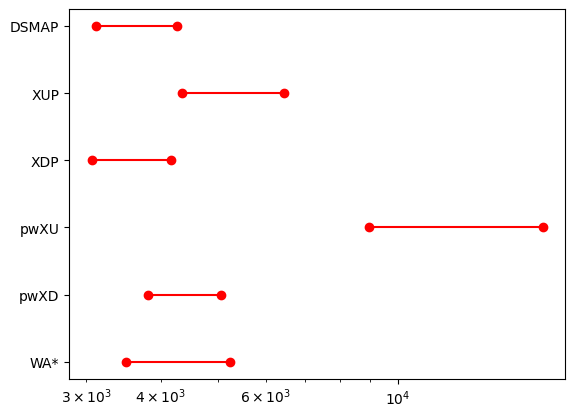

---------------------- weight=7.00 ----------------------
policy WA* :  mean: 3835.44 | lower bound: 3302.88 | upper bound: 4368.0
policy pwXD :  mean: 4375.62 | lower bound: 3785.97 | upper bound: 4965.27
policy pwXU :  mean: 7634.71 | lower bound: 5643.97 | upper bound: 9625.45
policy XDP :  mean: 3644.06 | lower bound: 3042.65 | upper bound: 4245.47
policy XUP :  mean: 4989.56 | lower bound: 4142.12 | upper bound: 5837.0
policy DSMAP :  mean: 3387.1 | lower bound: 2901.54 | upper bound: 3872.66


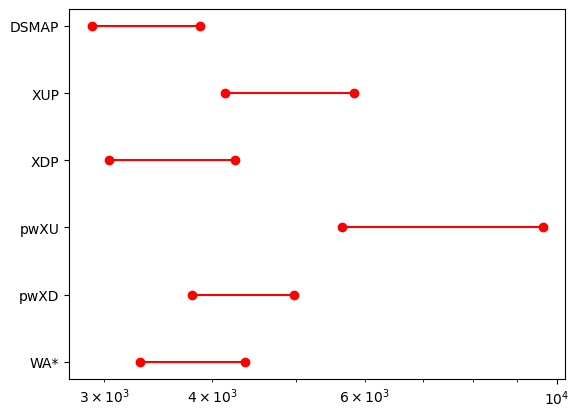

---------------------- weight=8.00 ----------------------
policy WA* :  mean: 3494.04 | lower bound: 2985.35 | upper bound: 4002.73
policy pwXD :  mean: 4413.42 | lower bound: 3818.89 | upper bound: 5007.95
policy pwXU :  mean: 5154.72 | lower bound: 4273.93 | upper bound: 6035.51
policy XDP :  mean: 3598.58 | lower bound: 3005.32 | upper bound: 4191.84
policy XUP :  mean: 4335.64 | lower bound: 3512.5 | upper bound: 5158.78
policy DSMAP :  mean: 3539.28 | lower bound: 3073.76 | upper bound: 4004.8


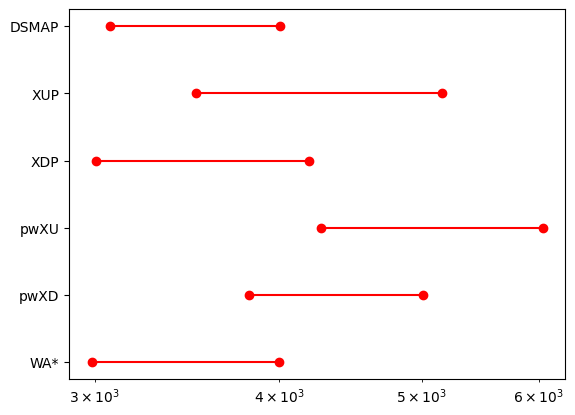

---------------------- weight=9.00 ----------------------
policy WA* :  mean: 4170.23 | lower bound: 3457.89 | upper bound: 4882.57
policy pwXD :  mean: 4287.5 | lower bound: 3689.37 | upper bound: 4885.63
policy pwXU :  mean: 4224.88 | lower bound: 3530.98 | upper bound: 4918.78
policy XDP :  mean: 3688.53 | lower bound: 3166.94 | upper bound: 4210.12
policy XUP :  mean: 3816.71 | lower bound: 3211.29 | upper bound: 4422.13
policy DSMAP :  mean: 3109.36 | lower bound: 2671.77 | upper bound: 3546.95


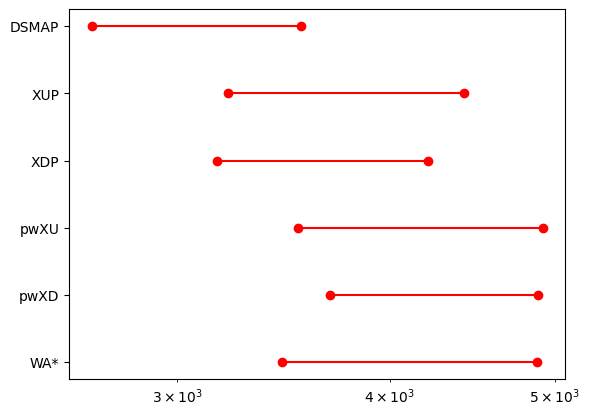

---------------------- weight=10.00 ----------------------
policy WA* :  mean: 3757.9 | lower bound: 3161.87 | upper bound: 4353.93
policy pwXD :  mean: 4620.91 | lower bound: 4016.72 | upper bound: 5225.1
policy pwXU :  mean: 3581.89 | lower bound: 3111.41 | upper bound: 4052.37
policy XDP :  mean: 3581.23 | lower bound: 3113.24 | upper bound: 4049.22
policy XUP :  mean: 3858.76 | lower bound: 3162.57 | upper bound: 4554.95
policy DSMAP :  mean: 3126.16 | lower bound: 2702.34 | upper bound: 3549.98


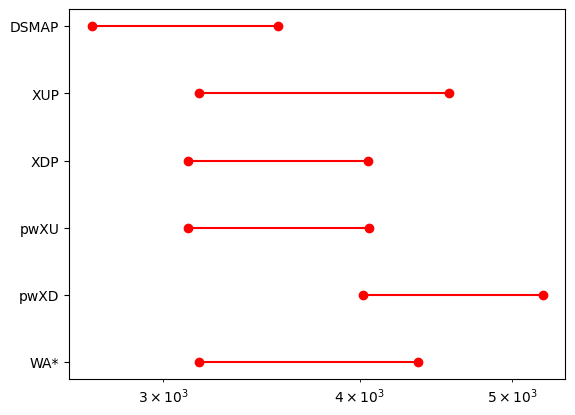

In [19]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st 
  
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for w in (Weights.keys()):
    print('---------------------- weight='+str(w)+' ----------------------')
    data_dict = {}
    data_dict['category'] = list(int_to_alg.values())
    data_dict['lower'] = []
    data_dict['upper'] = []
    for alg in range(len(Weights[w])):
        print('policy', int_to_alg[alg], ': ',end=' ')
        data = np.array(Weights[w][alg])

        # m, l, u = mean_confidence_interval(data, confidence=0.95)
        l, u = st.norm.interval(confidence=0.95, loc=np.mean(data), scale=st.sem(data))
        m = np.mean(data)

        print('mean:', round(m, 2), '| lower bound:', round(l, 2), '| upper bound:',round(u, 2))
        data_dict['lower'].append(l)
        data_dict['upper'].append(u)
    
    dataset = pd.DataFrame(data_dict)
    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-')
    plt.yticks(range(len(dataset)),list(dataset['category']))
    plt.xscale('log')
    plt.show()